# Chat ou Chien !! une méthode d'apprentissage automatique.

Dans une entreprise de marketing, on veut faire une étude sur les clients qui fréquentent un grand magasin. L'idée est d'estimer le pourcentage de clients qui ont des chats et ceux qui ont des chiens, afin de prendre des décisions marketing ciblées. Vous proposez d'utiliser une caméra pour détecter et compter les deux animaux dans le magasin. La première étape du projet est de développer un modèle qui peut détecter le chat ou le chien. Ainsi, dans ce brief, en utilisant une base de données, vous allez entrainer un modèle d'apprentissage automatique avec un apprentissage supervisé.

# Veille technologique: Opencv python

- Préparation données imagerie pour méthode classique d'apprentissage automatique
- Entrainement et évaluation (similaire aux briefs précédents)

## Operations Simples

In [1]:
import sys
print(sys.version)


3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]


In [3]:
# use opencv to load and display the image
import os
import numpy as np
from PIL import Image

In [7]:
# Paramètres
size = (150, 150)  # Nouvelle taille des images
image_directory = 'dataset/'  # Répertoire contenant les images
new_image_directory = 'dataset_resized/'  # Répertoire pour enregistrer les images redimensionnées

# Liste pour stocker les images et les labels
images = []
labels = []

# Lister les images de chats
cat_images = os.listdir(os.path.join(image_directory, "Cat"))

# Lister les images de chiens
dog_images = os.listdir(os.path.join(image_directory, "Dog"))

# Fonction pour charger, redimensionner et enregistrer les images
def load_and_resize_images(image_list, directory, label, new_image_directory):
    for image_name in image_list:
        try:
            image_path = os.path.join(directory, image_name)
            image = Image.open(image_path).convert('RGB')  # Convertir en RGB
            image = image.resize(size)  # Redimensionner l'image
            images.append(np.asarray(image))  # Ajouter l'image à la liste
            labels.append(label)  # Ajouter le label correspondant

            # Enregistrer l'image redimensionnée
            new_image_path = os.path.join(new_image_directory, image_name)
            image.save(new_image_path)


        except Exception as e:
            print(f"Erreur lors du chargement de l'image {image_path}: {e}")

# Charger, redimensionner et enregistrer les images de chats
load_and_resize_images(cat_images, os.path.join(image_directory, "Cat"), 0, new_image_directory)

# Charger, redimensionner et enregistrer les images de chiens
load_and_resize_images(dog_images, os.path.join(image_directory, "Dog"), 1, new_image_directory)

# Transformer les listes en tableaux numpy
images_np = np.array(images)
labels_np = np.array(labels)

# Sauvegarder les données
np.save('images.npy', images_np)
np.save('labels.npy', labels_np)

# Afficher les formes des tableaux pour vérification
print(f"Forme des images: {images_np.shape}")


Erreur lors du chargement de l'image dataset/Cat\666.jpg: cannot identify image file 'C:\\Users\\yzi\\Desktop\\Travaux\\neurones-convolutifs-CNN-\\dataset\\Cat\\666.jpg'
Erreur lors du chargement de l'image dataset/Cat\Thumbs.db: cannot identify image file 'C:\\Users\\yzi\\Desktop\\Travaux\\neurones-convolutifs-CNN-\\dataset\\Cat\\Thumbs.db'
Erreur lors du chargement de l'image dataset/Dog\11702.jpg: cannot identify image file 'C:\\Users\\yzi\\Desktop\\Travaux\\neurones-convolutifs-CNN-\\dataset\\Dog\\11702.jpg'
Erreur lors du chargement de l'image dataset/Dog\Thumbs.db: cannot identify image file 'C:\\Users\\yzi\\Desktop\\Travaux\\neurones-convolutifs-CNN-\\dataset\\Dog\\Thumbs.db'
Forme des images: (24998, 150, 150, 3)


In [8]:
from sklearn.model_selection import train_test_split

# Supposons que `images_np` est ton tableau d'images et `labels_np` ton tableau de labels.

# Redimensionner les données d'images pour le modèle de machine learning classique
# Chaque image de taille (150, 150, 3) est aplatie en un vecteur de taille (150*150*3,)
images_reshaped = images_np.reshape(images_np.shape[0], -1)

# Séparer les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels_np, test_size=0.2, stratify=labels_np)

print(f"Forme de X_train: {X_train.shape}")
print(f"Forme de X_test: {X_test.shape}")



Forme de X_train: (19998, 67500)
Forme de X_test: (5000, 67500)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Créer une instance du RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Prédire les labels de l'ensemble de test
y_pred = clf.predict(X_test)


In [10]:
from sklearn.metrics import classification_report

# Calculer et afficher le rapport de classification
report = classification_report(y_test, y_pred, target_names=['Chat', 'Chien'])
print(report)


              precision    recall  f1-score   support

        Chat       0.64      0.71      0.67      2500
       Chien       0.67      0.60      0.63      2500

    accuracy                           0.65      5000
   macro avg       0.66      0.65      0.65      5000
weighted avg       0.66      0.65      0.65      5000



### Essayer de normaliser chaque image entre 0 et 255 et rentrainer le modèle. Y a-t-il une amélioration ?

In [11]:
# Normaliser les données d'images
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Créer une nouvelle instance du modèle
clf_normalized = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement normalisé
clf_normalized.fit(X_train_normalized, y_train)

# Prédire les labels de l'ensemble de test normalisé
y_pred_normalized = clf_normalized.predict(X_test_normalized)

# Évaluer le modèle normalisé
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print(f"Accuracy du modèle normalisé: {accuracy_normalized}")

# Utiliser classification_report pour évaluer le modèle normalisé
report_normalized = classification_report(y_test, y_pred_normalized, target_names=['Chat', 'Chien'])
print(report_normalized)


Accuracy du modèle normalisé: 0.6538
              precision    recall  f1-score   support

        Chat       0.64      0.71      0.67      2500
       Chien       0.67      0.60      0.63      2500

    accuracy                           0.65      5000
   macro avg       0.66      0.65      0.65      5000
weighted avg       0.66      0.65      0.65      5000



# Neural networ MLP

Entrainer un modèle MLP pour detecter la class Dog ou Cat.

In [12]:
# use PCA to reduce dimensions
# check this tuto: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# creer un reseau de neurone avec une couche d'entrée de taille (150*150*3), deux couches caché de taille 128 et une activation "relu". 
# Dernière couche de taille 1 avec une activation sigmoid. Choisir la bonne "loss function" et "optimizer"
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

# Dimension de l'entrée
input_shape = (150*150*3,)  # Taille aplatie de tes images
# Couche d'entrée
input_layer = Input(shape=input_shape)
# Premier couche cachée
x = Dense(128, activation='relu')(input_layer)
# Deuxième couche cachée
x = Dense(128, activation='relu')(x)
# Couche de sortie
output_layer = Dense(1, activation='sigmoid')(x)

# Créer le modèle
model = Model(inputs=input_layer, outputs=output_layer)

# Compiler le modèle
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,656,769 (33.02 MB)

 Trainable params: 8,656,769 (33.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 198ms/step - accuracy: 0.5085 - loss: 884.9339 - val_accuracy: 0.5228 - val_loss: 70.1413
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.5267 - loss: 101.8063 - val_accuracy: 0.5085 - val_loss: 85.2196
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - accuracy: 0.5490 - loss: 55.9318 - val_accuracy: 0.5328 - val_loss: 20.3801
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - accuracy: 0.5591 - loss: 27.1275 - val_accuracy: 0.5700 - val_loss: 17.6065
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.5523 - loss: 19.0194 - val_accuracy: 0.5123 - val_loss: 19.5261
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 184ms/step - accuracy: 0.5437 - loss: 19.8574 - val_accuracy: 0.5060 - val_loss: 18.0981
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 181ms/step - accuracy: 0.5365 - loss: 33.6189 - val_accuracy: 0.5263 - val_loss: 8.6536
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - accuracy: 0

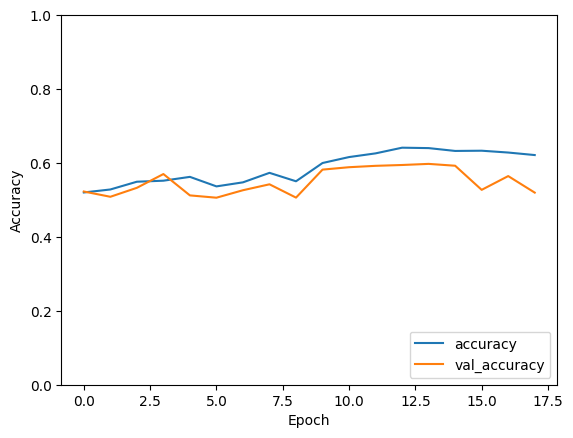

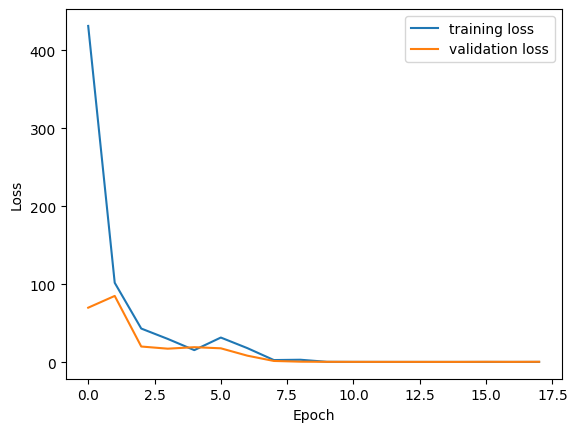

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Supposons que `X` est ton tableau d'images et `y` est un tableau de labels correspondants.
# Tu devrais avoir déjà chargé et préparé ces données.

# Définir le callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraîner le modèle avec le callback EarlyStopping
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=128, 
                    callbacks=[early_stopping])

# Afficher un résumé des performances du modèle

# Accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Losses
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 238ms/step - accuracy: 0.5578 - loss: 0.6888 - val_accuracy: 0.5383 - val_loss: 0.6878
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 199ms/step - accuracy: 0.5963 - loss: 0.6818 - val_accuracy: 0.5865 - val_loss: 0.6821
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - accuracy: 0.6281 - loss: 0.6736 - val_accuracy: 0.6010 - val_loss: 0.6765
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.6270 - loss: 0.6633 - val_accuracy: 0.6097 - val_loss: 0.6695
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.6410 - loss: 0.6525 - val_accuracy: 0.6055 - val_loss: 0.6645
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - accuracy: 0.6433 - loss: 0.6473 - val_accuracy: 0.5702 - val_loss: 0.6765
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.6316 - loss: 0.6450 - val_accuracy: 0.6018 - val_loss: 0.6594
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - accuracy: 0.6385 - loss: 0

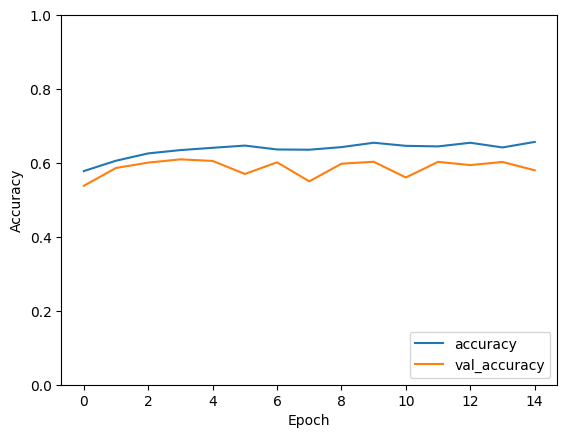

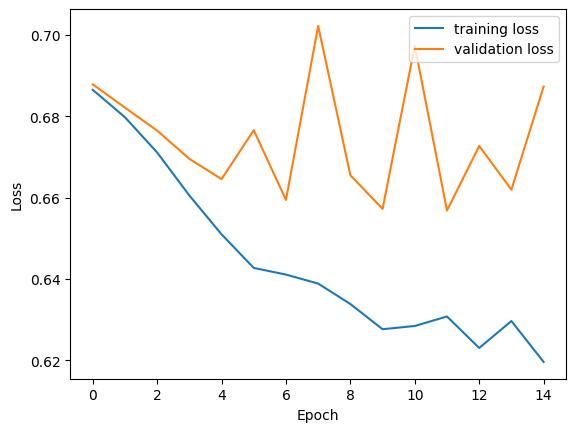

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Supposons que `X` est ton tableau d'images et `y` est un tableau de labels correspondants.
# Tu devrais avoir déjà chargé et préparé ces données.

# Définir le callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraîner le modèle avec le callback EarlyStopping
history = model.fit(X_train_normalized, y_train, 
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=128, 
                    callbacks=[early_stopping])

# Afficher un résumé des performances du modèle

# Accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Losses
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(X_test)
# Les prédictions sont des probabilités en raison de la couche de sortie sigmoid; les convertir en classes binaires (0 ou 1)
predictions = np.where(predictions < 0.5, 0, 1)

# Évaluer le modèle en utilisant classification_report
report = classification_report(y_test, predictions, target_names=['Classe 0', 'Classe 1'])
print(report)
